# LandCoverNet
> https://mlhub.earth/datasets?search=landcovernet
* input: Sentinel 1, Sentinel 2, Landsat 8
* task: land-cover classification (7 types)
> Water (permanent), Artificial, Natural, Snow/Ice (Permanent), Woody, Cultivated, Natural
* time series to point (pixel-wise)
* regions available (global): Australia, Europe, South America, North America /  Africa, Asia
* 10m label and input data resolution (spatially aligned)

In [3]:
folder_ = "/ds/images/AI4EO/multi/landcovernet/"


In [4]:
import os
from tqdm import tqdm
import pandas as pd
from src.core.image_read import LandCoverBuilder

LC_build = LandCoverBuilder(f"{folder_}/ref_landcovernet_eu_v1")
LC_build.label_to_name, LC_build.view_names, len(LC_build)

({0: 'No Data',
  1: 'Water',
  2: 'Artificial Bareground',
  3: 'Natural Bareground',
  4: 'Permanent Snow/Ice',
  5: 'Woody Vegetation',
  6: 'Cultivated Vegetation',
  7: '(Semi) Natural Vegetation'},
 ['sentinel_1', 'sentinel_2', 'landsat_8'],
 840)

## Metadata

In [6]:
L8_metadata_dates = pd.read_csv("./metadata_dates/eu/landsat_8_overall_info.csv")
S2_metadata_dates = pd.read_csv("./metadata_dates/eu/sentinel_2_overall_info.csv")
S1_metadata_dates = pd.read_csv("./metadata_dates/eu/sentinel_1_overall_info.csv")

L8_metadata_dates

,patch_id,dates,year,month,day,full_name,full_path
0,37TDK_27,20180107,2018,1,7,ref_landcovernet_eu_v1_source_landsat_8_37TDK_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
1,37TDK_27,20180114,2018,1,14,ref_landcovernet_eu_v1_source_landsat_8_37TDK_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
2,37TDK_27,20180123,2018,1,23,ref_landcovernet_eu_v1_source_landsat_8_37TDK_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
3,37TDK_27,20180130,2018,1,30,ref_landcovernet_eu_v1_source_landsat_8_37TDK_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
4,37TDK_27,20180208,2018,2,8,ref_landcovernet_eu_v1_source_landsat_8_37TDK_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
...,...,...,...,...,...,...,...
32251,35TMH_28,20181014,2018,10,14,ref_landcovernet_eu_v1_source_landsat_8_35TMH_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
32252,35TMH_28,20181030,2018,10,30,ref_landcovernet_eu_v1_source_landsat_8_35TMH_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
32253,35TMH_28,20181115,2018,11,15,ref_landcovernet_eu_v1_source_landsat_8_35TMH_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
32254,35TMH_28,20181201,2018,12,1,ref_landcovernet_eu_v1_source_landsat_8_35TMH_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...


## Labels distribution
General Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

folder_r = "./"
continent = "eu"
info_sum_f = pd.read_csv(f"{folder_r}/metadata_dates/{continent}/region_label_freq.csv", index_col=0)
info_sum_f_rel = info_sum_f/(256*256) #average per region
info_sum_c = pd.read_csv(f"{folder_r}/metadata_dates/{continent}/region_label_conf_avg.csv", index_col=0)

info_sum_f

,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,
37TDK_27,1,1822,2181,0,0,482,38999,22051
39VXD_22,0,0,2906,0,41,2627,55911,4051
35UMU_23,11,12344,240,0,75,37264,8032,7570
32TPT_18,2,10,0,0,1024,648,4,63848
31TEJ_29,0,0,60,0,47,53829,87,11513
...,...,...,...,...,...,...,...,...
34TCN_20,0,0,209,0,0,41416,32,23879
31UCU_10,1,887,977,0,0,9027,36932,17712
32UQD_03,0,0,20414,0,1,72,43397,1652


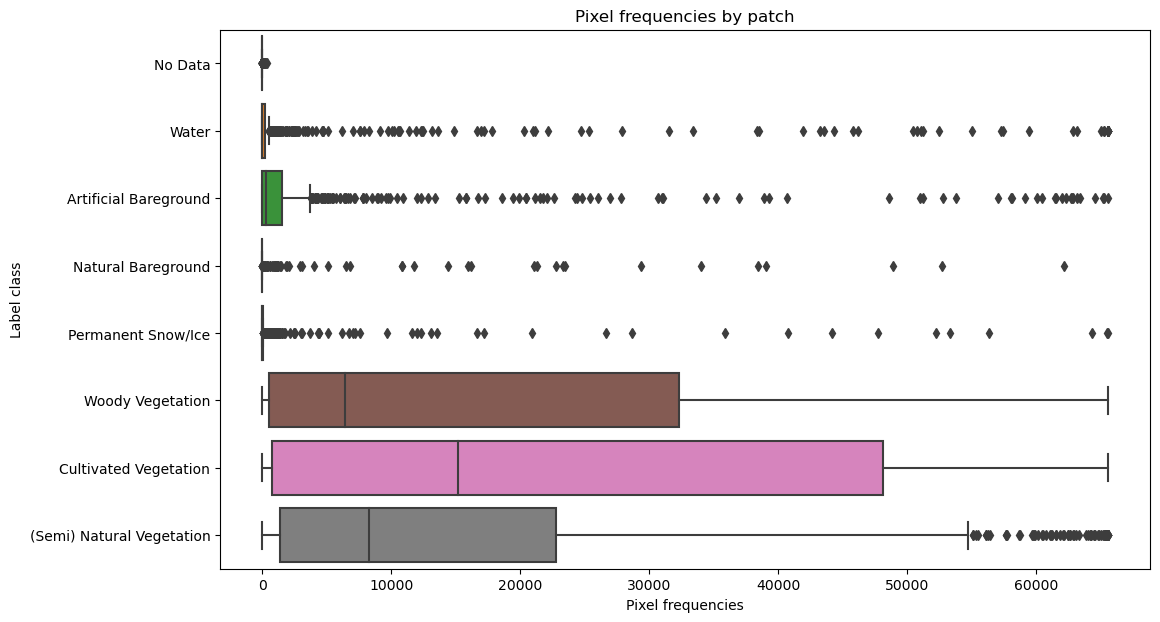

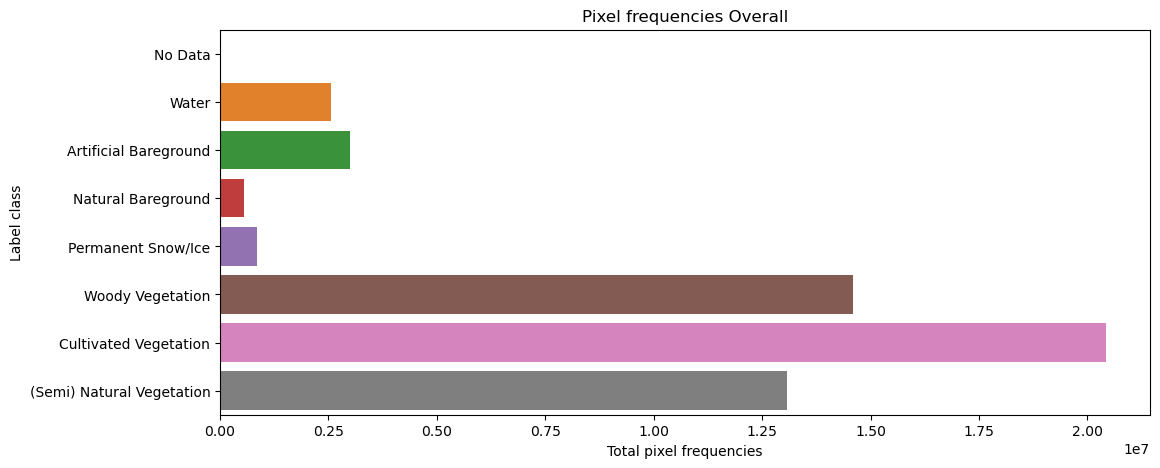

In [6]:
plt.figure(figsize=(12,7))
sns.boxplot(data=info_sum_f, orient="h")
plt.xlabel("Pixel frequencies")
plt.ylabel("Label class")
plt.title("Pixel frequencies by patch")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=info_sum_f.sum(), y=info_sum_f.columns)
plt.xlabel("Total pixel frequencies")
plt.ylabel("Label class")
plt.title("Pixel frequencies Overall")
plt.show()

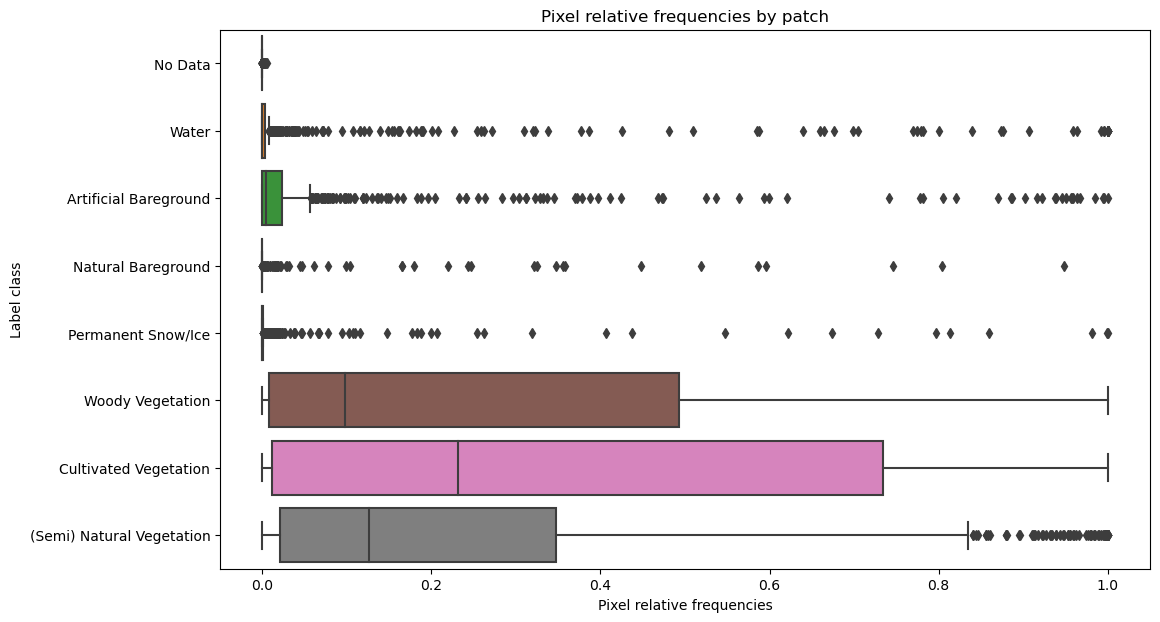

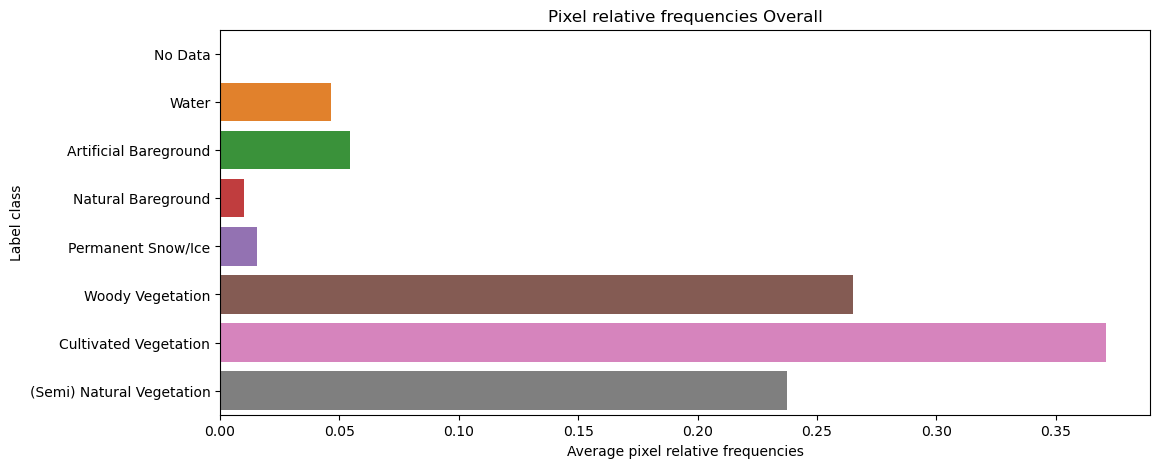

In [7]:
plt.figure(figsize=(12,7))
sns.boxplot(data=info_sum_f_rel, orient="h")
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies by patch")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=info_sum_f_rel.mean(), y=info_sum_f.columns)
plt.xlabel("Average pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies Overall")
plt.show()

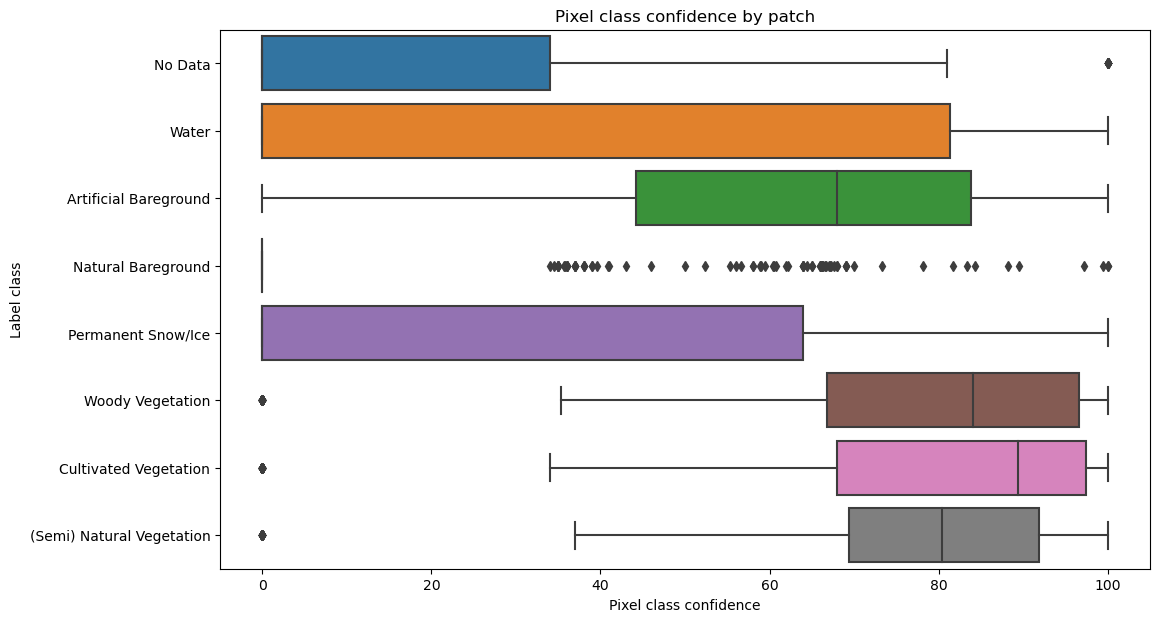

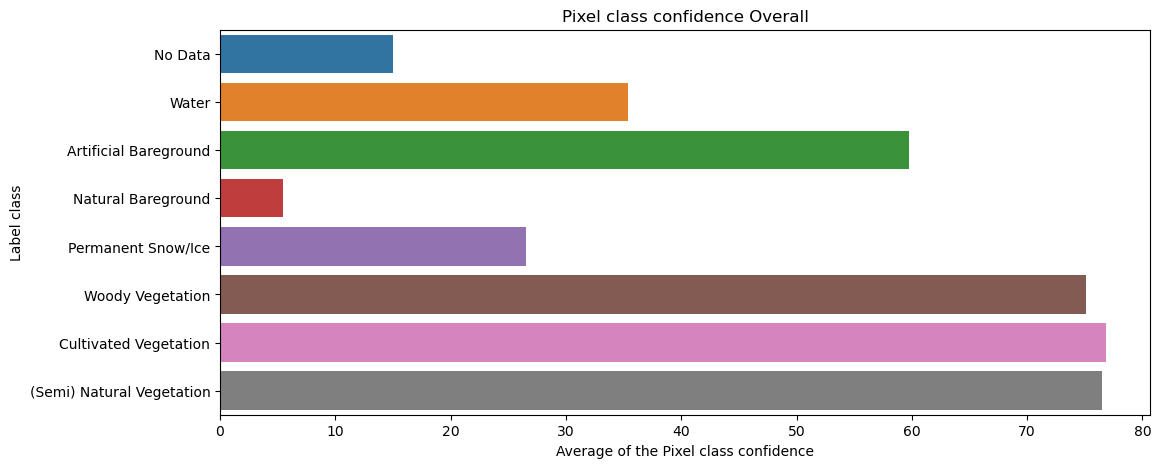

In [8]:
plt.figure(figsize=(12,7))
sns.boxplot(data=info_sum_c, orient="h")
plt.xlabel("Pixel class confidence")
plt.ylabel("Label class")
plt.title("Pixel class confidence by patch")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=info_sum_c.mean(), y=info_sum_f.columns)
plt.xlabel("Average of the Pixel class confidence")
plt.ylabel("Label class")
plt.title("Pixel class confidence Overall")
plt.show()

## Building test set
> Test set creation based on different versions
1) completely random
2) stratify on labels frequency
3) uniform label distribution on testing set
4) uniform label distribution on training set
5) country selection

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

folder_r = "./"
continent = "eu"
info_sum_f = pd.read_csv(f"{folder_r}/metadata_dates/{continent}/region_label_freq.csv", index_col=0)
info_sum_f_rel = info_sum_f/(256*256) #average per region
info_sum_c = pd.read_csv(f"{folder_r}/metadata_dates/{continent}/region_label_conf_avg.csv", index_col=0)

info_sum_f

,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,
37TDK_27,1,1822,2181,0,0,482,38999,22051
39VXD_22,0,0,2906,0,41,2627,55911,4051
35UMU_23,11,12344,240,0,75,37264,8032,7570
32TPT_18,2,10,0,0,1024,648,4,63848
31TEJ_29,0,0,60,0,47,53829,87,11513
...,...,...,...,...,...,...,...,...
34TCN_20,0,0,209,0,0,41416,32,23879
31UCU_10,1,887,977,0,0,9027,36932,17712
32UQD_03,0,0,20414,0,1,72,43397,1652


#### Random

In [11]:
from src.test_split.randomlike import random_selection
info_sum_f_rel_ext = random_selection(info_sum_f_rel, ratio=0.2)
info_sum_f_rel_ext

,test,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,,
37TDK_27,True,0.000015,0.027802,0.033279,0.0,0.000000,0.007355,0.595078,0.336472
39VXD_22,False,0.000000,0.000000,0.044342,0.0,0.000626,0.040085,0.853134,0.061813
35UMU_23,True,0.000168,0.188354,0.003662,0.0,0.001144,0.568604,0.122559,0.115509
32TPT_18,False,0.000031,0.000153,0.000000,0.0,0.015625,0.009888,0.000061,0.974243
31TEJ_29,True,0.000000,0.000000,0.000916,0.0,0.000717,0.821365,0.001328,0.175674
...,...,...,...,...,...,...,...,...,...
34TCN_20,False,0.000000,0.000000,0.003189,0.0,0.000000,0.631958,0.000488,0.364365
31UCU_10,False,0.000015,0.013535,0.014908,0.0,0.000000,0.137741,0.563538,0.270264
32UQD_03,False,0.000000,0.000000,0.311493,0.0,0.000015,0.001099,0.662186,0.025208


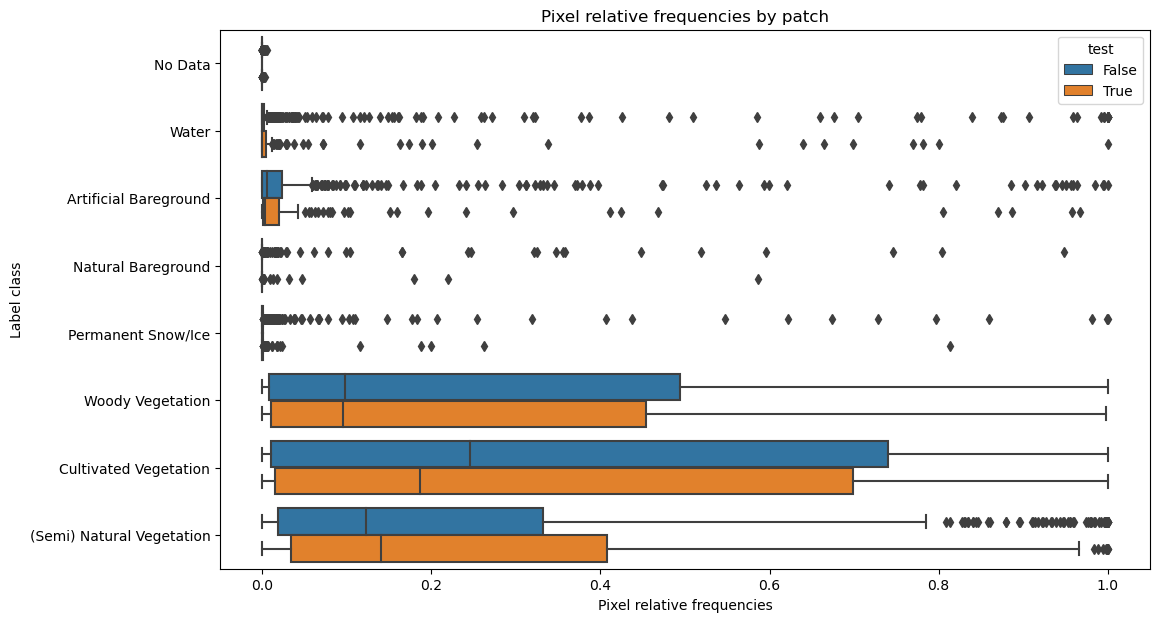

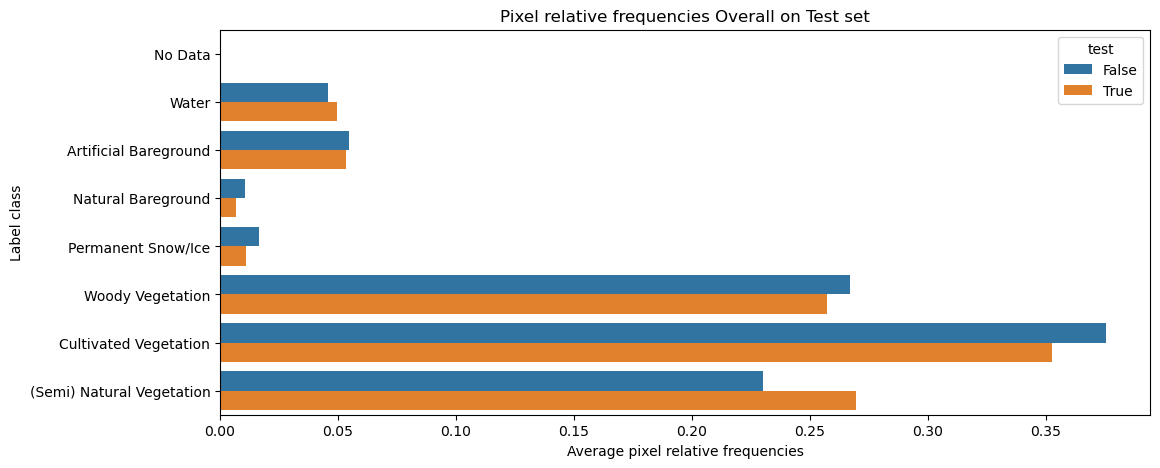

In [12]:
aux_plot = pd.melt(info_sum_f_rel_ext, value_vars=info_sum_f_rel.columns, ignore_index=False)
aux_plot = pd.merge(aux_plot,info_sum_f_rel_ext["test"], left_index=True,right_index=True)
plt.figure(figsize=(12,7))
sns.boxplot(data=aux_plot, orient="h", x="value",y="variable", hue="test")
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies by patch")
plt.show()

aux_plot = pd.melt(info_sum_f_rel_ext.groupby("test").mean(), value_vars=info_sum_f_rel.columns, ignore_index=False).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=aux_plot, x="value", y="variable", hue="test")
plt.xlabel("Average pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies Overall on Test set")
plt.show()

#### Uniform-like

In [21]:
from src.test_split.uniformlike import uniform_dist_selection

info_sum_f_rel_ext = uniform_dist_selection(info_sum_f_rel, ratio=0.2, mode="test")
#info_sum_f_rel_ext = uniform_dist_selection(info_sum_f_rel, ratio=0.8, mode="train")
info_sum_f_rel_ext

,test,JS_div,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,,,
37TDK_27,False,0.548616,0.000015,0.027802,0.033279,0.0,0.000000,0.007355,0.595078,0.336472
39VXD_22,False,0.592061,0.000000,0.000000,0.044342,0.0,0.000626,0.040085,0.853134,0.061813
35UMU_23,False,0.492853,0.000168,0.188354,0.003662,0.0,0.001144,0.568604,0.122559,0.115509
32TPT_18,True,0.674735,0.000031,0.000153,0.000000,0.0,0.015625,0.009888,0.000061,0.974243
31TEJ_29,False,0.630702,0.000000,0.000000,0.000916,0.0,0.000717,0.821365,0.001328,0.175674
...,...,...,...,...,...,...,...,...,...,...
34TCN_20,False,0.612746,0.000000,0.000000,0.003189,0.0,0.000000,0.631958,0.000488,0.364365
31UCU_10,False,0.519477,0.000015,0.013535,0.014908,0.0,0.000000,0.137741,0.563538,0.270264
32UQD_03,False,0.594119,0.000000,0.000000,0.311493,0.0,0.000015,0.001099,0.662186,0.025208


In [22]:
info_sum_f_rel_ext[info_sum_f_rel_ext["test"]]

,test,JS_div,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,,,
32TPT_18,True,0.674735,0.000031,0.000153,0.000000,0.0,0.015625,0.009888,0.000061,0.974243
38UNV_28,True,0.675847,0.000000,0.000000,0.000000,0.0,0.000000,0.000061,0.964981,0.034958
31TCF_16,True,0.663132,0.000015,0.000000,0.000397,0.0,0.000000,0.946304,0.050766,0.002518
38UNC_06,True,0.692890,0.000000,0.000000,0.000000,0.0,0.000000,0.000702,0.991257,0.008041
36UVB_17,True,0.679541,0.000000,0.000000,0.001984,0.0,0.000000,0.009506,0.981308,0.007202
...,...,...,...,...,...,...,...,...,...,...
38UNV_29,True,0.663276,0.000000,0.000000,0.000031,0.0,0.000000,0.000595,0.060715,0.938660
30VUJ_04,True,0.704932,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
36UVB_04,True,0.699078,0.000000,0.000000,0.002777,0.0,0.000000,0.000000,0.996689,0.000534


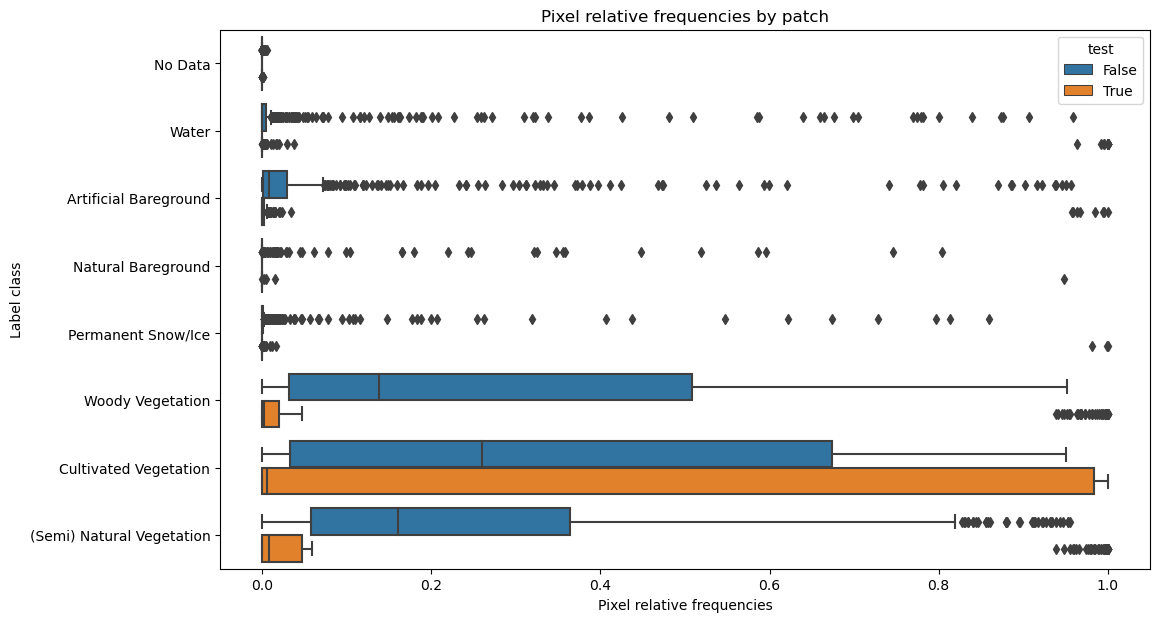

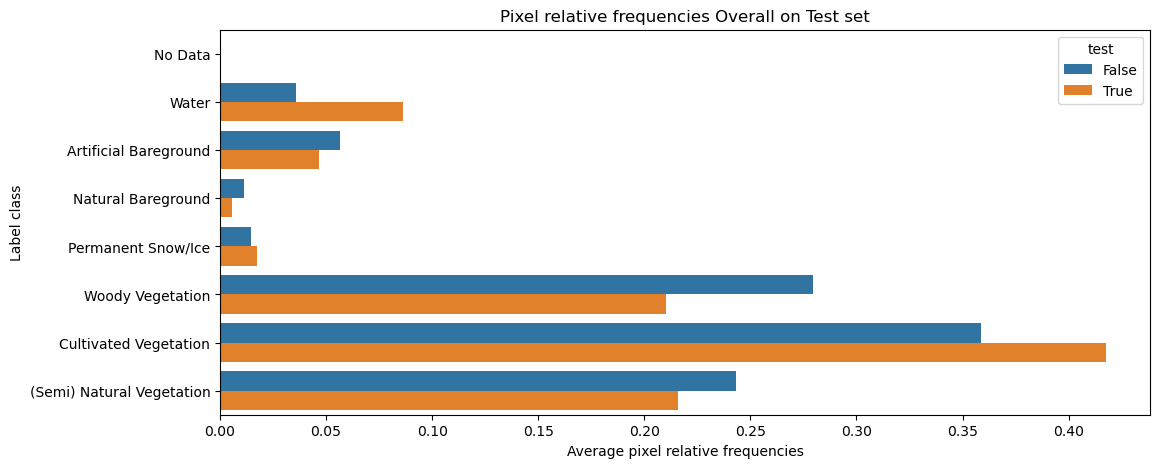

In [23]:
aux_plot = pd.melt(info_sum_f_rel_ext, value_vars=info_sum_f_rel.columns, ignore_index=False)
aux_plot = pd.merge(aux_plot,info_sum_f_rel_ext["test"], left_index=True,right_index=True)
plt.figure(figsize=(12,7))
sns.boxplot(data=aux_plot, orient="h", x="value",y="variable", hue="test")
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies by patch")
plt.show()

aux_plot = pd.melt(info_sum_f_rel_ext.groupby("test").mean(), value_vars=info_sum_f_rel.columns, ignore_index=False).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=aux_plot, x="value", y="variable", hue="test")
plt.xlabel("Average pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies Overall on Test set")
plt.show()

#### Stratify
not yet

In [91]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon
def stratify_dist_selection(df_regions: pd.DataFrame, ratio:float=0):
    reference_distribution = df_regions.mean()

    if ratio != 0:
        n_samples = np.sum(np.random.rand(len(df_regions)) <= ratio_)
        
        df_regions_out = df_regions.copy()
        df_regions_out.insert(
                    0, 
                    "JS_div",
                    df_regions.apply(lambda x: jensenshannon(reference_distribution, x), axis=1)
                    )
        indx_test = df_regions_out.sort_values("JS_div", ascending=False)[:n_samples].index

        df_regions_out.insert(0, "test", np.zeros(len(df_regions_out), dtype=bool))
        df_regions_out.loc[indx_test,"test"] = True
        return df_regions_out

info_sum_f_rel_ext = stratify_dist_selection(info_sum_f_rel, ratio=0.2)
info_sum_f_rel_ext

,test,JS_div,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,,,
37TDK_27,False,0.325841,0.000015,0.027802,0.033279,0.0,0.000000,0.007355,0.595078,0.336472
39VXD_22,False,0.383160,0.000000,0.000000,0.044342,0.0,0.000626,0.040085,0.853134,0.061813
35UMU_23,False,0.339371,0.000168,0.188354,0.003662,0.0,0.001144,0.568604,0.122559,0.115509
32TPT_18,True,0.600363,0.000031,0.000153,0.000000,0.0,0.015625,0.009888,0.000061,0.974243
31TEJ_29,False,0.492168,0.000000,0.000000,0.000916,0.0,0.000717,0.821365,0.001328,0.175674
...,...,...,...,...,...,...,...,...,...,...
34TCN_20,False,0.459325,0.000000,0.000000,0.003189,0.0,0.000000,0.631958,0.000488,0.364365
31UCU_10,False,0.200823,0.000015,0.013535,0.014908,0.0,0.000000,0.137741,0.563538,0.270264
32UQD_03,False,0.483450,0.000000,0.000000,0.311493,0.0,0.000015,0.001099,0.662186,0.025208


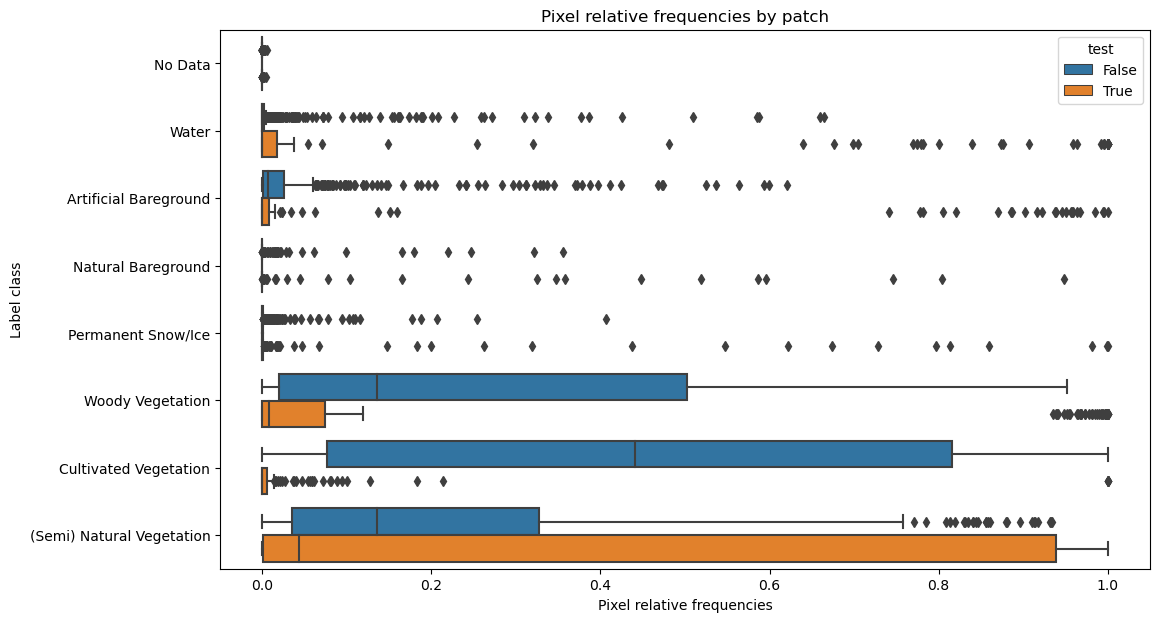

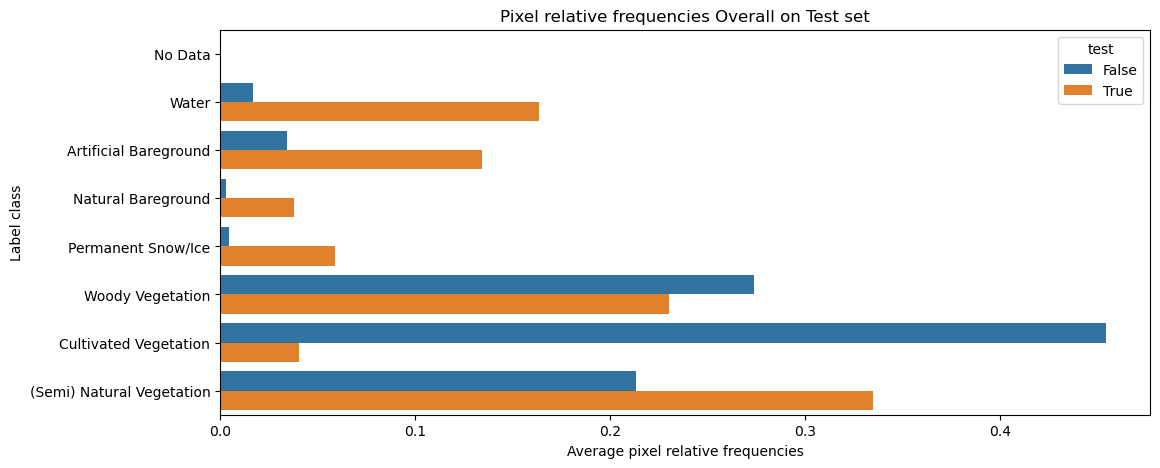

In [92]:
aux_plot = pd.melt(info_sum_f_rel_ext, value_vars=info_sum_f_rel.columns, ignore_index=False)
aux_plot = pd.merge(aux_plot,info_sum_f_rel_ext["test"], left_index=True,right_index=True)
plt.figure(figsize=(12,7))
sns.boxplot(data=aux_plot, orient="h", x="value",y="variable", hue="test")
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies by patch")
plt.show()

aux_plot = pd.melt(info_sum_f_rel_ext.groupby("test").mean(), value_vars=info_sum_f_rel.columns, ignore_index=False).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=aux_plot, x="value", y="variable", hue="test")
plt.xlabel("Average pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies Overall on Test set")
plt.show()

In [4]:
reference_distribution = info_sum_f_rel.mean()
reference_distribution

No Data                      0.000074
Water                        0.046495
Artificial Bareground        0.054515
Natural Bareground           0.010008
Permanent Snow/Ice           0.015312
Woody Vegetation             0.265062
Cultivated Vegetation        0.370951
(Semi) Natural Vegetation    0.237584
dtype: float64

In [5]:
from scipy.special import kl_div, rel_entr
from scipy.spatial.distance import jensenshannon
jensenshannon(reference_distribution, info_sum_f_rel.loc["35UMU_23"])

0.33937061180141503

In [84]:
info_sum_f_rel

,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,
37TDK_27,0.000015,0.027802,0.033279,0.0,0.000000,0.007355,0.595078,0.336472
39VXD_22,0.000000,0.000000,0.044342,0.0,0.000626,0.040085,0.853134,0.061813
35UMU_23,0.000168,0.188354,0.003662,0.0,0.001144,0.568604,0.122559,0.115509
32TPT_18,0.000031,0.000153,0.000000,0.0,0.015625,0.009888,0.000061,0.974243
31TEJ_29,0.000000,0.000000,0.000916,0.0,0.000717,0.821365,0.001328,0.175674
...,...,...,...,...,...,...,...,...
34TCN_20,0.000000,0.000000,0.003189,0.0,0.000000,0.631958,0.000488,0.364365
31UCU_10,0.000015,0.013535,0.014908,0.0,0.000000,0.137741,0.563538,0.270264
32UQD_03,0.000000,0.000000,0.311493,0.0,0.000015,0.001099,0.662186,0.025208


In [75]:
random_selection(info_sum_f, ratio=0.1)["Test"].sum()

88

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit
sh_split = StratifiedShuffleSplit(n_splits=1, test_size=None)
d = sh_split.split(_, info_sum_f_rel)
d

<generator object BaseShuffleSplit.split at 0x7f4044738c10>

In [83]:
for a in d:
    print(a)

TypeError: Singleton array array(<generator object BaseShuffleSplit.split at 0x7f4044738b30>,
      dtype=object) cannot be considered a valid collection.

#### Country-selections
> Select patches that belong to a specific country

In [4]:
from src.test_split.countries import countries_selection

info_countries = pd.read_csv("./split_samples/eu/info_countries.csv", index_col=0)

countries=["Germany"]

info_countries_ext = countries_selection(info_countries,countries=countries )
info_countries_ext = info_countries_ext[~info_countries_ext.index.duplicated(keep='first')]
info_countries_ext

,test,Region,Subregion,Country,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
30SWH_00,False,Europe,Southern Europe,Spain,0.000214,0.377029,0.031601,0.060974,0.000000,0.113571,0.000000,0.416611
30SWH_01,False,Europe,Southern Europe,Spain,0.000000,0.000000,0.003174,0.000000,0.000000,0.000381,0.975891,0.020554
30SWH_02,False,Europe,Southern Europe,Spain,0.000000,0.000000,0.002640,0.000000,0.000000,0.000000,0.997360,0.000000
30SWH_03,False,Europe,Southern Europe,Spain,0.000000,0.000000,0.002502,0.000000,0.000000,0.156921,0.000320,0.840256
30SWH_04,False,Europe,Southern Europe,Spain,0.000000,0.000000,0.000000,0.000000,0.000000,0.999985,0.000015,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
39VXD_25,False,Asia,Central Asia,Russia,0.000000,0.000000,0.001511,0.000000,0.005249,0.794662,0.055954,0.142624
39VXD_26,False,Asia,Central Asia,Russia,0.000000,0.000000,0.000122,0.000000,0.000778,0.114517,0.776581,0.108002
39VXD_27,False,Asia,Central Asia,Russia,0.000000,0.034882,0.003433,0.000000,0.013107,0.186401,0.259872,0.502304
39VXD_28,False,Asia,Central Asia,Russia,0.000000,0.000000,0.000809,0.000000,0.000000,0.951630,0.001434,0.046127


In [5]:
info_countries_ext[info_countries_ext["test"]]

,test,Region,Subregion,Country,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
32TPT_00,True,Europe,Western Europe,Austria,0.000000,0.963348,0.000153,0.0,0.000214,0.028595,0.007690,0.000000
32TPT_01,True,Europe,Western Europe,Austria,0.000000,0.029099,0.967041,0.0,0.000732,0.002731,0.000397,0.000000
32TPT_04,True,Europe,Western Europe,Austria,0.000000,0.000046,0.000000,0.0,0.000000,0.994431,0.005524,0.000000
32TPT_05,True,Europe,Western Europe,Austria,0.000000,0.012146,0.002258,0.0,0.000000,0.005020,0.980545,0.000031
32TPT_07,True,Europe,Western Europe,Austria,0.000000,0.000961,0.007278,0.0,0.000198,0.333603,0.657959,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
32UQD_25,True,Europe,Western Europe,Germany,0.000000,0.071472,0.077515,0.0,0.001709,0.007584,0.781509,0.060211
32UQD_26,True,Europe,Western Europe,Germany,0.000000,0.000000,0.012726,0.0,0.000000,0.004028,0.967682,0.015564
32UQD_27,True,Europe,Western Europe,Germany,0.000397,0.000000,0.014343,0.0,0.000275,0.261856,0.657028,0.066101
32UQD_28,True,Europe,Western Europe,Germany,0.000000,0.000000,0.001938,0.0,0.000000,0.754196,0.200378,0.043488


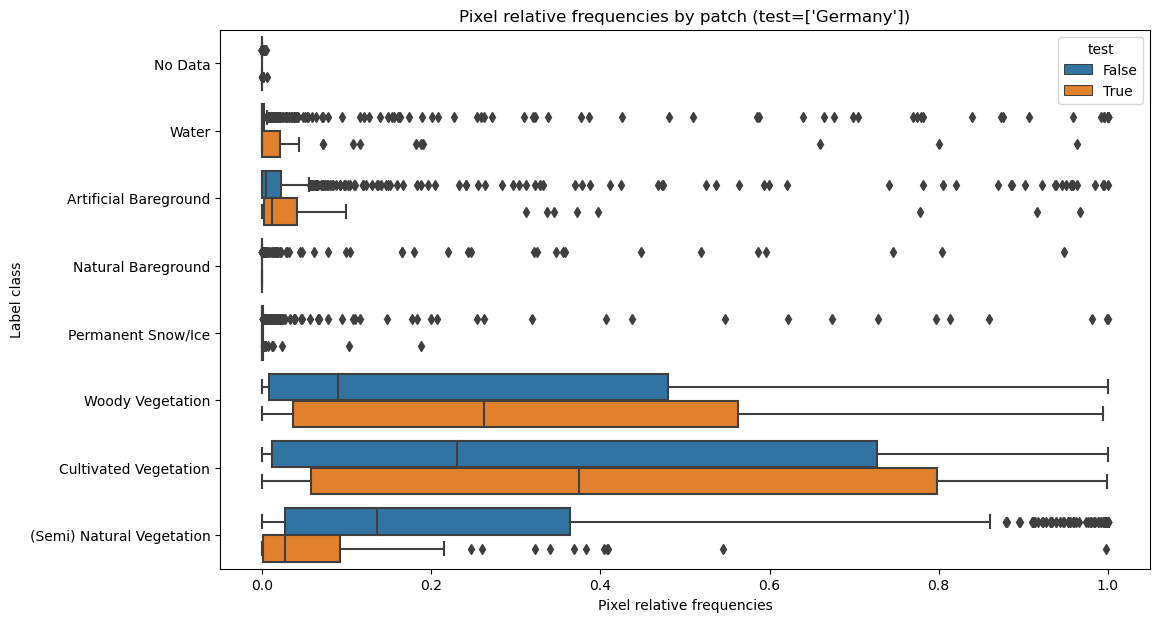

/tmp/ipykernel_3451577/2887040940.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_plot = pd.melt(info_countries_ext.groupby("test").mean(), value_vars=info_sum_f_rel.columns, ignore_index=False).reset_index()


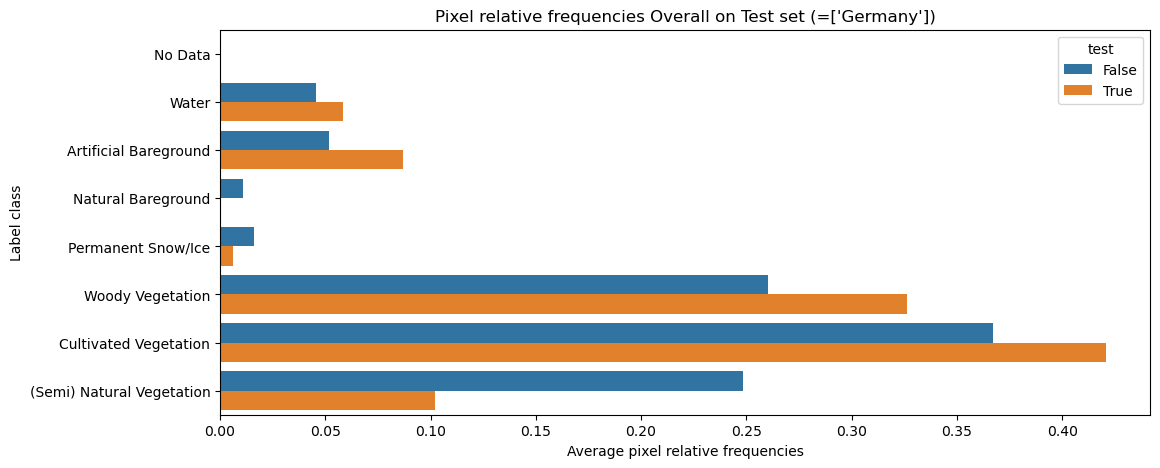

In [9]:
aux_plot = pd.melt(info_countries_ext, value_vars=info_sum_f_rel.columns, ignore_index=False)
aux_plot = pd.merge(aux_plot,info_countries_ext["test"], left_index=True,right_index=True)
plt.figure(figsize=(12,7))
sns.boxplot(data=aux_plot, orient="h", x="value",y="variable", hue="test")
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title(f"Pixel relative frequencies by patch (test={countries})")
plt.show()

aux_plot = pd.melt(info_countries_ext.groupby("test").mean(), value_vars=info_sum_f_rel.columns, ignore_index=False).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=aux_plot, x="value", y="variable", hue="test")
plt.xlabel("Average pixel relative frequencies")
plt.ylabel("Label class")
plt.title(f"Pixel relative frequencies Overall on Test set (={countries})")
plt.show()